In [1]:
#load data
import os                    #python中的os模块用于处理文件和目录
import skimage               #python中的skimage模块用于图像处理
import numpy as np           #python中的numpy模块用于科学计算
from skimage import data,transform
from skimage.color import rgb2gray     #rgb2gray将图片转化为灰度
##

#here data_directory="/home/zhangxueying/image/TrafficSigns/Training"
def load_data(data_directory):
    directories=[d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory,d))]
    #d is every classification file
    labels=[]
    images=[]
    for d in directories:
        #每一类的路径
        label_directory=os.path.join(data_directory,d)
        file_names=[os.path.join(label_directory,f) for f in os.listdir(label_directory) if f.endswith(".ppm")]
        #file_names is every photo which is end with ".ppm"
        for f in file_names:
            images.append(skimage.data.imread(f))   #read image
            labels.append(int(d))                   #read label
    return images,labels

#images and labels are list

ROOT_PATH="/Users/liujing/Documents/GitHub/CVData/"
train_data_directory=os.path.join(ROOT_PATH,"TrafficSigns/Training")
test_data_directory=os.path.join(ROOT_PATH,"TrafficSigns/Testing")
images,labels=load_data(train_data_directory)

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]
# Convert `images28` to an array
images28 = np.array(images28)
# Convert `images28` to grayscale
images28 = rgb2gray(images28)

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


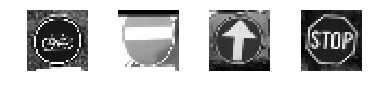

In [3]:
import matplotlib.pyplot as plt      #python中强大的画图模块
# from load import*                    #导入和预处理代码写于load.py中，需要用到其中加载和处理后的images28

traffic_signs = [300, 2250, 3650, 4000]      #随机选取

for i in range(len(traffic_signs)):     #i from 0 to 3
    plt.subplot(1, 4, i + 1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    #你确实必须指定颜色图(即 cmap)，并将其设置为 gray 以给出灰度图像的图表。
    # 这是因为 imshow() 默认使用一种类似热力图的颜色图。
    plt.subplots_adjust(wspace=0.5)       #调整各个图之间的间距

# Show the plot
plt.show()

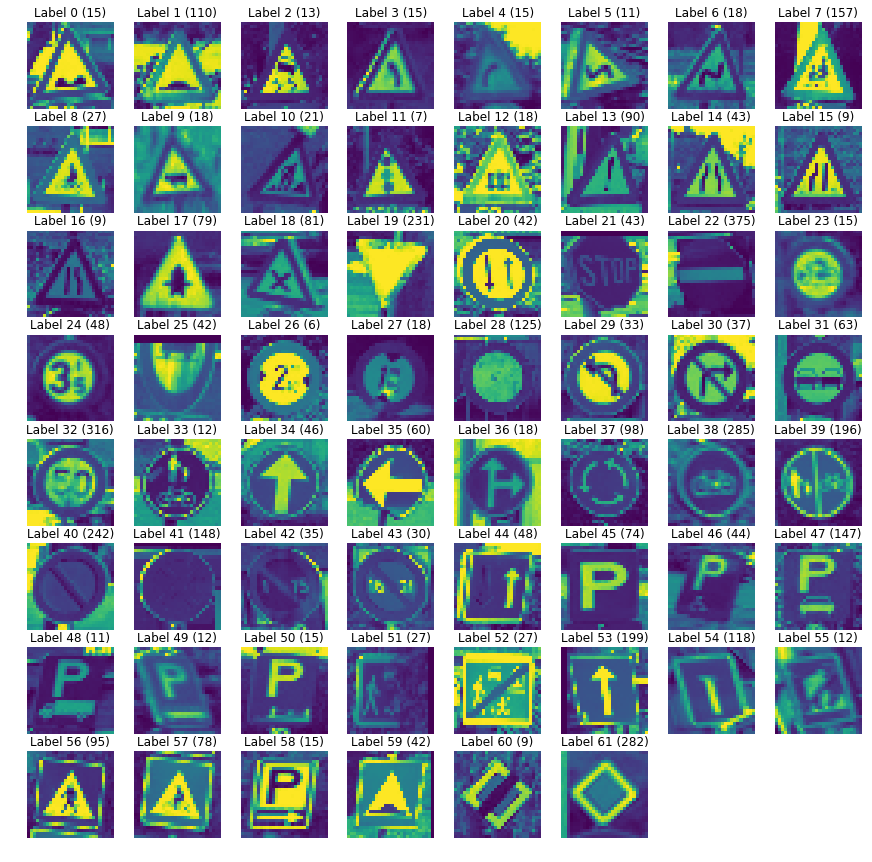

In [4]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt
# from load import*

# Get the unique labels
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images28[labels.index(label)]
    # Define 64 subplots
    plt.subplot(8, 8, i)

    # Don't include axes
    plt.axis('off')

    # Add a title to each subplot
    plt.title("Label {0} ({1})".format(label, labels.count(label)))

    # Add 1 to the counter
    i += 1

    # And you plot this first image
    plt.imshow(image)

# Show the plot
plt.show()

In [6]:
# Import `tensorflow`
import tensorflow as tf
# from load import*

# Initialize placeholders
x = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28])
y = tf.placeholder(tf.int32, [None])


#然后构建你的网络。首先使用 flatten() 函数展平输入，
# 其会给你一个形状为 [None, 784] 的数组，而不是 [None, 28, 28]——这是你的灰度图像的形状。
# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer构建一个全连接层，其可以生成大小为 [None, 62] 的 logits。logits 是运行在早期层未缩放的输出上的函数，其使用相对比例来了解单位是否是线性的。
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
#定义损失函数了。sparse_softmax_cross_entropy_with_logits()，其可以计算 logits 和标签之间的稀疏 softmax 交叉熵。回归(regression)被用于预测连续值，而分类(classification)则被用于预测离散值或数据点的类别。你可以使用 reduce_mean() 来包裹这个函数，它可以计算一个张量的维度上各个元素的均值。
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                                     logits=logits))
# Define an optimizer
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

'''print("images_flat: ", images_flat)

print("logits: ", logits)

print("loss: ", loss)

print("predicted_labels: ", correct_pred)
'''
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
    print('EPOCH', i)
    _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
    if i % 10 == 0:
        print("Loss: ", loss)
    print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 32
DONE 

[53, 22, 47, 7, 61, 0, 61, 19, 37, 28]
[53 22 18  7 61  1 61 38 61 28]


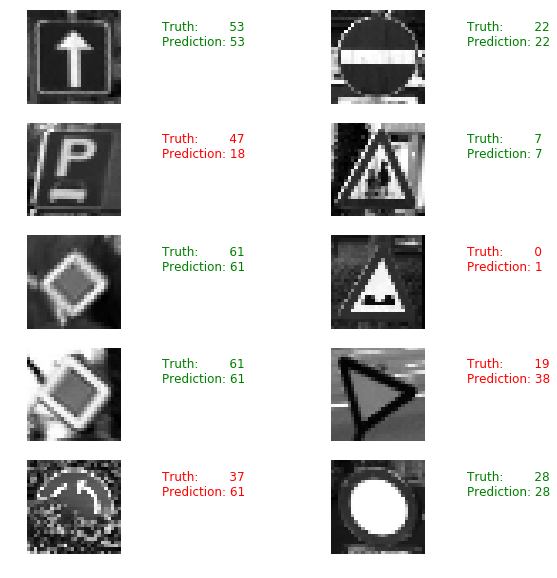

In [8]:
# Import `matplotlib`
import matplotlib.pyplot as plt
import random       #随机
# from nnet import*  
# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10) 
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]

# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2, 1 + i)
    plt.axis('off')
    color = 'green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction),
             fontsize=12, color=color)
    plt.imshow(sample_images[i], cmap="gray")
#显示
plt.show()

In [10]:
# Import `skimage`
from skimage import transform
# from nnet import*

# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray

test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)
  
# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Accuracy: 0.656
